In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "Unnamed: 0"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data

,cluster,f1,grad,sol,error,1,2,3,4,5,6
0,0,50,200,"[1.9200961438763418, 4.073631235716507, 2.8737...",15.628084,48.576899,239.129812,489.715570,661.231234,766.609893,1116.494330
1,10,50,200,"[5.760288431629025, 12.262286733387473, 8.4595...",24.382654,43.640753,204.546364,452.024051,649.803535,766.694146,1075.572826
2,11,50,200,"[5.760288431629025, 12.262286733387473, 8.4103...",19.437585,51.272328,252.101882,515.506276,689.643363,766.740233,1103.113806
3,12,50,200,"[5.760288431629025, 12.262286733387473, 8.5773...",18.454554,51.328468,248.469362,508.544002,686.402076,766.717107,1113.451554
4,13,50,200,"[5.760288431629025, 12.262286733387473, 8.5773...",18.435526,50.958371,249.440837,504.411456,673.242717,766.624762,1144.466143
5,14,50,200,"[5.760288431629025, 12.262286733387473, 8.5773...",18.520893,50.963142,249.460485,504.760347,674.151671,766.625258,1144.595723
6,15,50,200,"[5.760288431629025, 12.262286733387473, 8.5773...",17.505874,50.914037,247.767700,499.108658,674.801381,766.579990,1139.309523
7,16,50,200,"[5.760288431629025, 12.33330656660036, 8.57737...",17.509598,50.914833,247.775061,499.121701,674.819211,766.580816,1139.338871
8,17,50,200,"[5.760288431629025, 12.135060470449169, 8.5773...",20.393164,51.082638,250.371669,506.876387,686.023716,766.592711,1167.120322
9,18,50,200,"[5.760288431629025, 12.135060470449169, 8.5773...",20.480097,51.106905,250.428217,507.473217,685.656415,766.592546,1167.395812


In [59]:
data_clean = pd.concat([data["f1"], data["grad"], data["cluster"], data["error"]], axis=1)

for index, row in data_clean.iterrows():
    if row["cluster"] == 0:
        baseline = row["error"]
        data_clean.iloc[index, 3] = 1
    else:
        data_clean.iloc[index, 3] = row["error"]/baseline

data_clean.head()

,f1,grad,cluster,error
0,50,200,0,1.000000
1,50,200,10,1.560182
2,50,200,11,1.243760
3,50,200,12,1.180858
4,50,200,13,1.179641


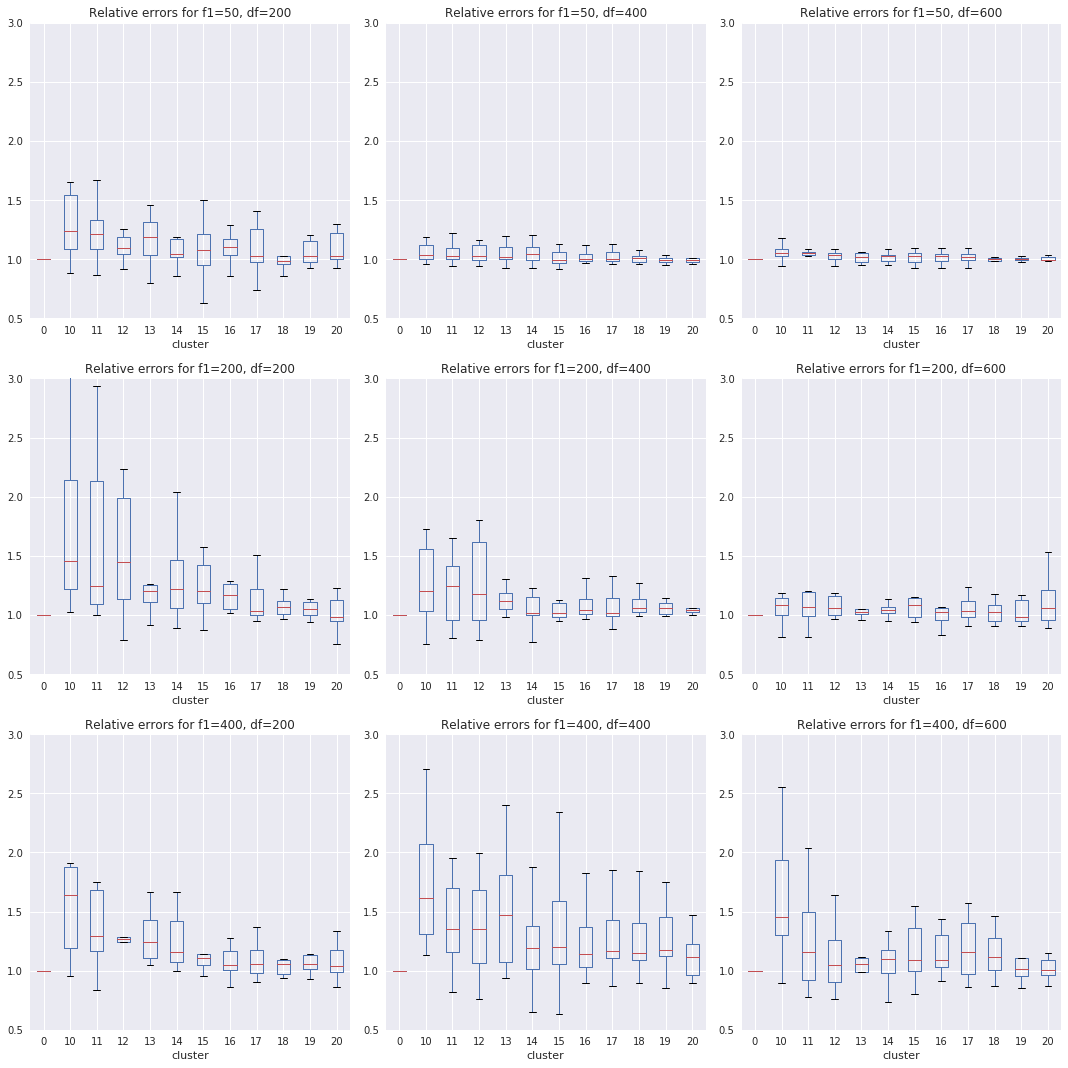

In [84]:
import itertools

i = 0
plt.figure(figsize=(15, 15))

for f1, df in list(itertools.product([50, 200, 400], [200, 400, 600])):
    
    plt.subplot(3, 3, i+1)
    ax=plt.gca()

    test = data_clean[(data_clean["f1"] == f1) & (data_clean["grad"] == df)].drop(["f1", "grad"], axis=1)
    axis = test.boxplot(column="error", by="cluster", ax=ax)
    axis.set_ylim(0.5, 3)
    plt.title("Relative errors for f1={}, df={}".format(f1, df))
    plt.suptitle("")

    
    i += 1
    
plt.tight_layout()
plt.show()

### Log_10(E/p) for each solution

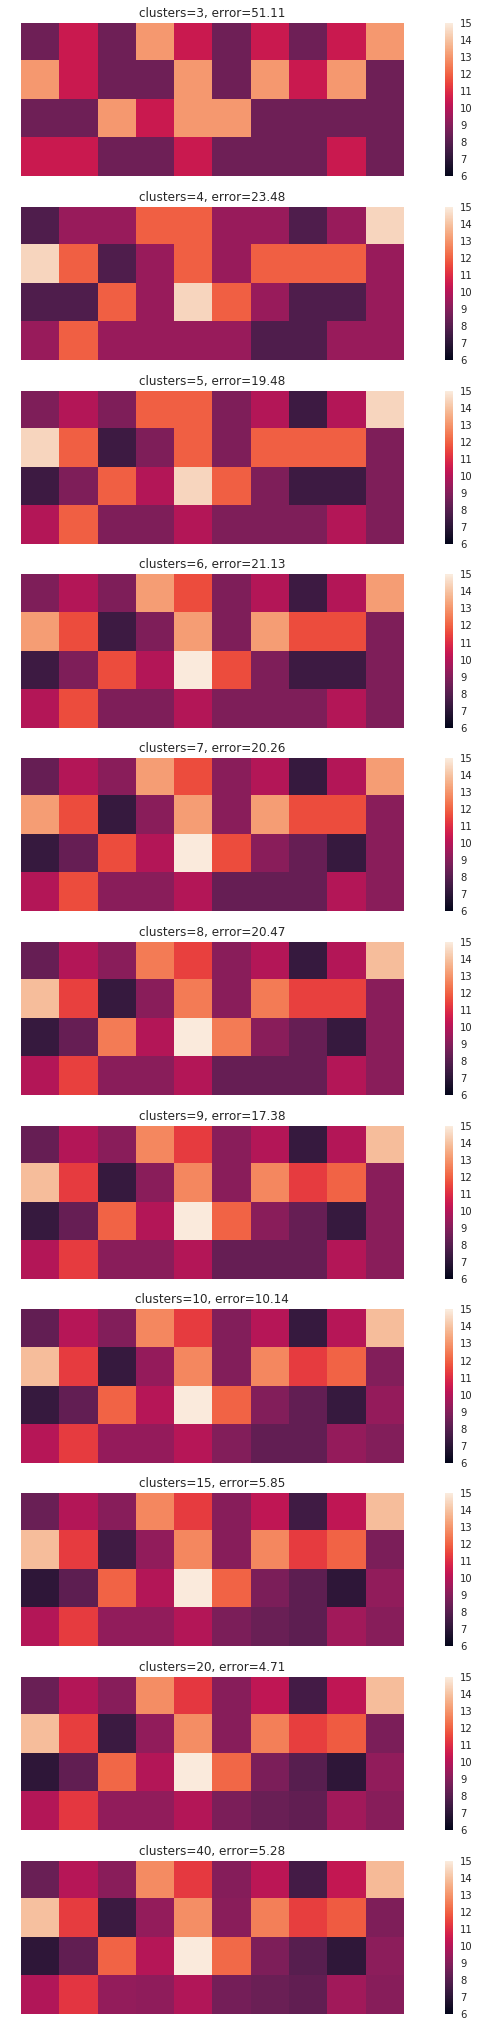

In [139]:
dataS = data.drop(["f1", "grad", 1, 2, 3, 4, 5, 6], axis=1)
dataS['sol'] = [x[1:-1] for x in data['sol']]
dataS = dataS.join(dataS['sol'].str.split(', ', expand=True).apply(pd.to_numeric))

dataL = dataS.drop(["sol", "cluster", "error"], axis=1)

fig = plt.figure(figsize=(15, 40))

for i in range(1, 12):
    fig.add_subplot(12, 1, i+1)
    plt.imshow([dataL.iloc[i][x:40:4] for x in range(4)], vmin=6, vmax=15)
    plt.axis("off")
    plt.title("clusters={}, error={:.2f}".format(dataS.iloc[i]["cluster"], dataS.iloc[i]["error"]))
    plt.colorbar()

plt.show()